In [1]:
import sys, os
import ROOT
import numpy as np
import xgboost as xgb
import pandas as pd
from CMS_lumi import CMS_lumi
from colorPrint import *
from ROOT import RooFit

ROOT.RooMsgService.instance().setSilentMode(True)
ROOT.gROOT.LoadMacro("../interface/tdrstyle.C")
ROOT.gROOT.ProcessLine("setTDRStyle();")

Welcome to JupyROOT 6.24/02


/home/chenghan/.conda/envs/hdalitz2/lib/python3.8/site-packages/ROOT/_facade.py:150: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return _orig_ihook(name, *args, **kwds)
/home/chenghan/.conda/envs/hdalitz2/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index



RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



0

In [2]:
region = "EE"
iBE = 0 if region == "EB" else 1

features = [
    "rho",
    "nVtxF",
    "eleSCEta_Lead",
    "eleSCPhi_Lead",
    "eleSCRawEn_Lead",
    "eleCalibPt_Lead",

    "eledEtaAtVtx_Lead",
    "eledPhiAtVtx_Lead",
    "elePtError_Lead",
    "eleHoverE_Lead",
    "eleEoverP_Lead",
    "eleEoverPout_Lead",
    "eleEoverPInv_Lead",

    "eleSCEtaWidth_Lead",
    "eleSCPhiWidth_Lead",
    "eleSigmaIEtaIEtaFull5x5_Lead",
    "eleSigmaIPhiIPhiFull5x5_Lead",
    "eleR9Full5x5_Lead",
    "eleBrem_Lead",

    "gsfPtSum",
    "gsfPtRatio",
    "diTrkPt",
    "gsfDeltaR"
]
cols = features + ["instwei", "mcwei", "genwei", "puwei", "plot_wei", "genPt", "elePt_Lead", "eleCalibPt_Lead", "eleHDALCalibPt_Lead"]

ROOT.EnableImplicitMT(10)
data = ROOT.RDataFrame("miniTree", "../reg_signal_calib_{}.root".format(region)).AsNumpy(columns=cols)
df = pd.DataFrame(data)
df

,rho,nVtxF,eleSCEta_Lead,eleSCPhi_Lead,eleSCRawEn_Lead,eleCalibPt_Lead,eledEtaAtVtx_Lead,eledPhiAtVtx_Lead,elePtError_Lead,eleHoverE_Lead,...,diTrkPt,gsfDeltaR,instwei,mcwei,genwei,puwei,plot_wei,genPt,elePt_Lead,eleHDALCalibPt_Lead
0,13.590172,33.0,-1.995154,-0.376693,188.907639,58.306744,-0.001842,-0.012093,1.188210,0.010480,...,63.682663,0.000600,0.077851,0.000046,1.0,1.027534,0.000047,57.210503,58.105934,58.375519
1,25.617367,32.0,-1.857920,-0.802474,244.086456,82.147949,-0.000047,-0.006651,1.689001,0.006609,...,110.010475,0.004290,0.077851,0.000046,-1.0,1.020131,-0.000047,83.327995,79.950409,81.061974
2,31.366610,33.0,2.182095,1.050884,684.330627,160.015793,0.006974,0.000043,2.839284,0.025785,...,33.084003,2.432877,0.077851,0.000046,1.0,1.005217,0.000046,156.428268,162.348785,160.258881
3,21.720106,31.0,-2.195780,1.626013,464.668701,109.735664,-0.000381,-0.006981,1.830179,0.013879,...,123.216843,0.002060,0.077851,0.000046,-1.0,0.993223,-0.000045,107.866592,109.910492,109.845406
4,13.848698,26.0,-2.380200,2.165001,248.386871,47.315189,0.018447,-0.001301,2.076225,0.007189,...,52.333641,3.246224,0.077851,0.000046,1.0,0.946601,0.000043,50.897121,47.474709,49.806725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928336,18.040998,14.0,-1.912612,-3.129380,1001.259338,304.983826,0.001723,-0.004205,4.371614,0.004829,...,701.477661,3.664343,1.000000,0.000325,-1.0,0.982020,-0.000319,297.692291,297.293610,298.195312
2928337,27.765306,31.0,2.160005,-1.908536,236.574936,57.739765,0.001359,0.009264,1.110083,0.031660,...,55.576591,2.885603,1.000000,0.000325,1.0,1.008708,0.000328,57.511459,57.804882,58.414139
2928338,32.909252,37.0,2.487038,-2.777860,350.317963,62.132351,-0.006464,-0.010139,2.141922,0.030353,...,117.910767,0.019188,1.000000,0.000325,1.0,0.998316,0.000325,65.627792,63.069328,64.923431
2928339,25.520697,31.0,1.685159,-0.413179,129.932816,56.195950,0.001285,-0.007344,1.310621,0.009428,...,57.934410,1.742064,1.000000,0.000325,1.0,1.081665,0.000352,57.302380,55.058434,57.342064


In [3]:
import matplotlib.pyplot as plt
def pltSty(ax, xName="x-axis", yName="y-axis", TitleSize=15, LabelSize=15, TickSize=15, yAuto=True):
    from matplotlib.ticker import AutoLocator, AutoMinorLocator
    ax.set_xlabel(xName, fontsize=LabelSize, loc="right")
    ax.set_ylabel(yName, fontsize=LabelSize, loc="top")
    ax.text(1, 1, "(13 TeV)", horizontalalignment="right", verticalalignment="bottom", transform=ax.transAxes, fontsize=TitleSize)
    ax.text(0, 1, "CMS", horizontalalignment="left", verticalalignment="bottom", transform=ax.transAxes, fontsize=TitleSize * 1.2, fontweight="bold")
    ax.text(TitleSize * 0.009 + 0.025, 1, "Simulation Preliminary", horizontalalignment="left", verticalalignment="bottom", transform=ax.transAxes, fontsize=TitleSize)

    ax.xaxis.set_major_locator(AutoLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    if (yAuto):
        ax.yaxis.set_major_locator(AutoLocator())
        ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(direction="in", length=7, labelsize=TickSize, top=True, right=True)
    ax.tick_params(direction="in", length=4, which="minor", labelsize=TickSize, top=True, right=True)


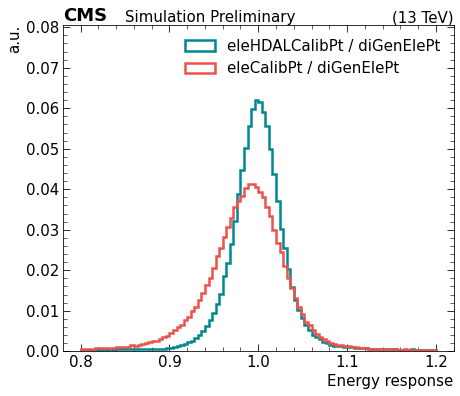

In [4]:
df["wei"] = df["plot_wei"] 
weights = df["wei"].to_numpy()

plt.rcParams["figure.figsize"] = (7, 6)
pltSty(plt.gca(), xName="Energy response", yName="a.u.")
binContent, binEdge, _ = plt.hist(df["eleHDALCalibPt_Lead"]/df["genPt"], bins=100, range=(0.8, 1.2), histtype="step", weights=weights/sum(weights), color="#008891", linewidth=2.5, label="eleHDALCalibPt / diGenElePt")
plt.hist(df["eleCalibPt_Lead"]/df["genPt"], bins=100, range=(0.8, 1.2), histtype="step", weights=weights/sum(weights), linewidth=2.5, label="eleCalibPt / diGenElePt", color="#EC524B")
plt.ylim([0, max(binContent) * 1.3])
plt.legend(loc="best", fontsize=15, edgecolor="none")

reg_ext = "EB" if iBE == 0 else "EE"
directory = "../plots/validation_calib/resp_allbin/{}".format(reg_ext)
if not os.path.exists(directory):
    os.makedirs(directory)
plt.savefig("{}/resp_allbin_{}.pdf".format(directory, region))

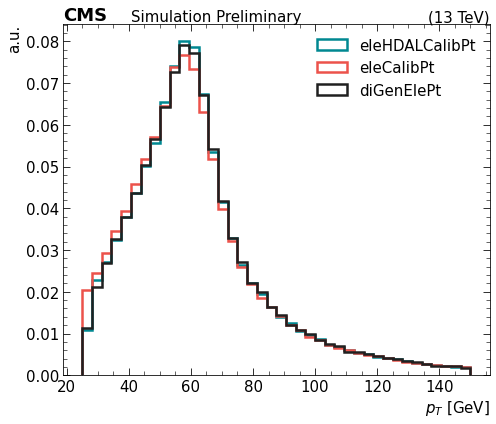

In [5]:
pltSty(plt.gca(), xName="$p_{T}$ [GeV]", yName="a.u.")
binContent, binEdge, _ = plt.hist(df["eleHDALCalibPt_Lead"],    bins=40, range=(25, 150), histtype="step", color="#008891", linewidth=2.5, label="eleHDALCalibPt", weights=weights/sum(weights))
binContent, binEdge, _ = plt.hist(df["eleCalibPt_Lead"],        bins=40, range=(25, 150), histtype="step", color="#EC524B", linewidth=2.5, label="eleCalibPt", weights=weights/sum(weights))
binContent, binEdge, _ = plt.hist(df["genPt"],                  bins=40, range=(25, 150), histtype="step", color="#202020", linewidth=2.5, label="diGenElePt", weights=weights/sum(weights))
plt.legend(loc="best", fontsize=15, edgecolor="none")
plt.tight_layout()

In [6]:
df["resp_XGB"] = df["eleHDALCalibPt_Lead"]/df["genPt"]
df["resp_EGM"] = df["eleCalibPt_Lead"]/df["genPt"]

genPt = df["genPt"].to_numpy()
resp_XGB = df["resp_XGB"].to_numpy()
resp_EGM = df["resp_EGM"].to_numpy()

bins = 350 if iBE == 0 else 300
hist2D_XGB = ROOT.TH2D("hist2D_XGB", "", 13, 25, 155, bins, 0, 2)
hist2D_EGM = ROOT.TH2D("hist2D_EGM", "", 13, 25, 155, bins, 0, 2)

for i in range(len(resp_XGB)):
    hist2D_XGB.Fill(genPt[i], resp_XGB[i], weights[i])
    hist2D_EGM.Fill(genPt[i], resp_EGM[i], weights[i])
    
hist2D_XGB.Print("all")

TH1.Print Name  = hist2D_XGB, Entries= 2928341, Total sum= 114.991
 fSumw[0][0]=0, x=20, y=-0.00333333, error=0
 fSumw[1][0]=0, x=30, y=-0.00333333, error=0
 fSumw[2][0]=0, x=40, y=-0.00333333, error=0
 fSumw[3][0]=0, x=50, y=-0.00333333, error=0
 fSumw[4][0]=0, x=60, y=-0.00333333, error=0
 fSumw[5][0]=0, x=70, y=-0.00333333, error=0
 fSumw[6][0]=0, x=80, y=-0.00333333, error=0
 fSumw[7][0]=0, x=90, y=-0.00333333, error=0
 fSumw[8][0]=0, x=100, y=-0.00333333, error=0
 fSumw[9][0]=0, x=110, y=-0.00333333, error=0
 fSumw[10][0]=0, x=120, y=-0.00333333, error=0
 fSumw[11][0]=0, x=130, y=-0.00333333, error=0
 fSumw[12][0]=0, x=140, y=-0.00333333, error=0
 fSumw[13][0]=0, x=150, y=-0.00333333, error=0
 fSumw[14][0]=0, x=160, y=-0.00333333, error=0
 fSumw[0][1]=0, x=20, y=0.00333333, error=0
 fSumw[1][1]=0, x=30, y=0.00333333, error=0
 fSumw[2][1]=0, x=40, y=0.00333333, error=0
 fSumw[3][1]=0, x=50, y=0.00333333, error=0
 fSumw[4][1]=0, x=60, y=0.00333333, error=0
 fSumw[5][1]=0, x=70, y=0.

In [7]:
def fit_resp(hist, pt_do, pt_up, method):
    # build fitting pdf
    x       = ROOT.RooRealVar("x", " ", 0, 2)
    mu      = ROOT.RooRealVar("mu",   " ",  hist.GetBinCenter(hist.GetMaximumBin()), 0.95, 1.05)
    sigma   = ROOT.RooRealVar("sigma",  " ", hist.GetStdDev(), 0.0, 0.5)
    alpha1  = ROOT.RooRealVar("alpha1", " ", 1,   1e-1,   3)
    alpha2  = ROOT.RooRealVar("alpha2", " ", 1,   1e-1,   3)
    n1      = ROOT.RooRealVar("n1",     " ", 80,    1,     200)
    n2      = ROOT.RooRealVar("n2",     " ", 80,    1,     200)
    pdf     = ROOT.RooCrystalBall("dcb", "dcb", x, mu, sigma, alpha1, n1, alpha2, n2)
    
    # histogram to be fitted
    dh = ROOT.RooDataHist("dh", "dh", x, ROOT.RooFit.Import(hist))
    x.setRange("fitRange", 0.65, 1.35)
    for i in range(10):
        results = pdf.fitTo(
            dh, 
            ROOT.RooFit.Minimizer("Minuit2", "minimize"),
            ROOT.RooFit.Range("fitRange"),
            ROOT.RooFit.Save(1), ROOT.RooFit.Strategy(2),
            ROOT.RooFit.SumW2Error(1), 
            ROOT.RooFit.PrintLevel(1)
        )
        if results.status() == 0:
            print(color.YELLOW + "Fitting succeed!" + color.END)
            break
    if results.status() != 0:
        print(color.RED + "Fitting failed after 10 trials!" + color.END)
        
    # visualization
    canv = ROOT.TCanvas("canv", "", 800, 650)
    canv.cd()
    canv.SetRightMargin(0.04)
    canv.SetTopMargin(0.075)
    canv.SetLeftMargin(0.14)
    canv.SetBottomMargin(0.14)

    xframe = x.frame(0.65, 1.35)
    dh.plotOn(
        xframe,
        RooFit.Name("hist"),
        # RooFit.Binning(nbins),
        RooFit.MarkerStyle(ROOT.kFullCircle), RooFit.MarkerSize(1.2),
        RooFit.LineWidth(2)
    )
    pdf.plotOn(
        xframe,
        RooFit.Name("pdf"),
        # RooFit.NormRange("NormRange"),
        RooFit.LineColor(ROOT.kRed - 4), RooFit.LineWidth(2)
    )
    dh.plotOn(
        xframe,
        RooFit.Name("hist"),
        # RooFit.Binning(nbins),
        RooFit.MarkerStyle(ROOT.kFullCircle), RooFit.MarkerSize(1.2),
        RooFit.LineWidth(2)
    )
    xframe.SetTitle("")
    xframe.GetXaxis().SetTitleSize(0.047)
    xframe.GetXaxis().SetLabelSize(0.046)
    xframe.GetXaxis().SetTitleOffset(1.24)
    xframe.GetXaxis().SetLabelOffset(0.012)
    xframe.GetXaxis().SetTitle("p^{reco}_{T} / p^{true}_{T}")
    # xframe.GetYaxis().SetTitle("Events / 0.005")
    xframe.GetYaxis().SetTitleSize(0.047)
    xframe.GetYaxis().SetLabelSize(0.046)
    xframe.GetYaxis().SetTitleOffset(1.4)
    xframe.SetMaximum(xframe.GetMaximum() * 1.5)
    xframe.SetMinimum(0)
    xframe.Draw()
    
    leg = ROOT.TLegend(0.17, 0.64, 0.45, 0.76)
    leg.SetTextFont(42)
    leg.SetTextSize(0.04)
    leg.SetFillColor(0)
    leg.SetLineColor(0)
    leg.AddEntry(xframe.findObject("hist"), "Simulation", "LE1P")
    leg.AddEntry(xframe.findObject("pdf"), "DCB", "l")
    leg.Draw("same")

    var1 = results.floatParsFinal().find("mu")
    var2 = results.floatParsFinal().find("sigma")
    ltx = ROOT.TLatex()
    ltx.SetNDC()
    ltx.SetTextFont(42)
    ltx.SetTextSize(0.045)
    ltx.DrawLatex(0.58, 0.86, " #mu = %.4f #pm %.4f" %(var1.getValV(), var1.getError()))
    ltx.DrawLatex(0.58, 0.81, " #sigma = %.4f #pm %.4f" %(var2.getValV(), var2.getError()))
    
    region = "ECAL Barrrel" if iBE == 0 else "ECAL Endcap"
    ltx.DrawLatex(0.18, 0.58, "%d < p^{true}_{T} < %d GeV" %(pt_do, pt_up))
    ltx.DrawLatex(0.18, 0.5, region)
    
    CMS_lumi(canv, 5, 10, "", 2017, True, "Simulation Preliminary", "H #rightarrow #gamma* #gamma #rightarrow ee#gamma", "")
    canv.Update()
    canv.RedrawAxis()

    reg_ext = "EB" if iBE == 0 else "EE"
    directory = "../plots/validation_calib/resp_fit/{}".format(reg_ext)
    if not os.path.exists(directory):
        os.makedirs(directory)
    canv.Print("{}/respFit_pt_{}_{}To{}GeV.pdf".format(directory, method, int(pt_do), int(pt_up)))
    canv.Close()
    
    return results

In [8]:
x_mu, y_mu, xerr_mu, yerr_mu = [], [], [], []
x_width, y_width, xerr_width, yerr_width = [], [], [], []
for i in range(hist2D_XGB.GetNbinsX()):
# for i in range(1):
    pt_do = hist2D_XGB.GetXaxis().GetBinLowEdge(i+1) 
    pt_up = hist2D_XGB.GetXaxis().GetBinUpEdge(i+1)
    print(color.GREEN + "[INFO] Perform the fitting in range [%d, %d]" %(int(pt_do), int(pt_up)) + color.END)
    histName_XGB = "hist1D_XGB_{}To{}".format(pt_do, pt_up)
    hist_XGB = hist2D_XGB.ProjectionY(histName_XGB, i+1, i+1).Clone()
    fitRes = fit_resp(hist_XGB, pt_do, pt_up, "XGB")
    fitRes.Print("V")
    
    x_mu.append(pt_do+(pt_up-pt_do)/2)
    y_mu.append(fitRes.floatParsFinal().find("mu").getValV())
    xerr_mu.append((pt_up-pt_do)/2)
    yerr_mu.append(fitRes.floatParsFinal().find("mu").getError())
    
    sigma_ave = fitRes.floatParsFinal().find("sigma").getValV()
    sigma_ave_err = fitRes.floatParsFinal().find("sigma").getError()
    x_width.append(pt_do+(pt_up-pt_do)/2)
    y_width.append(sigma_ave)
    xerr_width.append((pt_up-pt_do)/2)
    yerr_width.append(sigma_ave_err)
    
mu_err_XGB = ROOT.TGraphErrors(hist2D_XGB.GetNbinsX(), np.array(x_mu), np.array(y_mu), np.array(xerr_mu), np.array(yerr_mu)) 
width_err_XGB = ROOT.TGraphErrors(hist2D_XGB.GetNbinsX(), np.array(x_width), np.array(y_width), np.array(xerr_width), np.array(yerr_width)) 
width_err_XGB.Print()

[INFO] Perform the fitting in range [25, 35]
Fitting succeed!
[INFO] Perform the fitting in range [35, 45]
Fitting succeed!
[INFO] Perform the fitting in range [45, 55]
Fitting succeed!
[INFO] Perform the fitting in range [55, 65]
Fitting succeed!
[INFO] Perform the fitting in range [65, 75]
Fitting succeed!
[INFO] Perform the fitting in range [75, 85]
Fitting succeed!
[INFO] Perform the fitting in range [85, 95]
Fitting succeed!
[INFO] Perform the fitting in range [95, 105]
Fitting succeed!
[INFO] Perform the fitting in range [105, 115]
Fitting succeed!
[INFO] Perform the fitting in range [115, 125]
Fitting succeed!
[INFO] Perform the fitting in range [125, 135]
Fitting succeed!
[INFO] Perform the fitting in range [135, 145]
Fitting succeed!
[INFO] Perform the fitting in range [145, 155]
Fitting succeed!
[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 0.5] of the RooCrystalBall 'dcb' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- R

Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_XGB_25To35GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_XGB_35To45GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_XGB_45To55GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_XGB_55To65GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_XGB_65To75GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_XGB_75To85GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_XGB_85To95GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_XGB_95To105GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/val

In [9]:
x_mu_egm, y_mu_egm, xerr_mu_egm, yerr_mu_egm = [], [], [], []
x_width_egm, y_width_egm, xerr_width_egm, yerr_width_egm = [], [], [], []
for i in range(hist2D_EGM.GetNbinsX()):
    pt_do = hist2D_EGM.GetXaxis().GetBinLowEdge(i+1) 
    pt_up = hist2D_EGM.GetXaxis().GetBinUpEdge(i+1)
    print(color.GREEN + "[INFO] Perform the fitting in range [%d, %d]" %(int(pt_do), int(pt_up)) + color.END)
    histName_EGM = "hist1D_EGM_{}To{}".format(pt_do, pt_up) 
    hist_EGM = hist2D_EGM.ProjectionY(histName_EGM, i+1, i+1).Clone()
    fitRes = fit_resp(hist_EGM, pt_do, pt_up, "EGM")
    fitRes.Print("V")
    
    x_mu_egm.append(pt_do+(pt_up-pt_do)/2)
    y_mu_egm.append(fitRes.floatParsFinal().find("mu").getValV())
    xerr_mu_egm.append((pt_up-pt_do)/2)
    yerr_mu_egm.append(fitRes.floatParsFinal().find("mu").getError())
    
    sigma_ave = fitRes.floatParsFinal().find("sigma").getValV()
    sigma_ave_err = fitRes.floatParsFinal().find("sigma").getError()
    x_width_egm.append(pt_do+(pt_up-pt_do)/2)
    y_width_egm.append(sigma_ave)
    xerr_width_egm.append((pt_up-pt_do)/2)
    yerr_width_egm.append(sigma_ave_err)
    
mu_err_EGM = ROOT.TGraphErrors(hist2D_EGM.GetNbinsX(), np.array(x_mu_egm), np.array(y_mu_egm), np.array(xerr_mu_egm), np.array(yerr_mu_egm)) 
width_err_EGM = ROOT.TGraphErrors(hist2D_EGM.GetNbinsX(), np.array(x_width_egm), np.array(y_width_egm), np.array(xerr_width_egm), np.array(yerr_width_egm)) 
width_err_EGM.Print()

[INFO] Perform the fitting in range [25, 35]
Fitting succeed!
[INFO] Perform the fitting in range [35, 45]
Fitting succeed!
[INFO] Perform the fitting in range [45, 55]
Fitting succeed!
[INFO] Perform the fitting in range [55, 65]
Fitting succeed!
[INFO] Perform the fitting in range [65, 75]
Fitting succeed!
[INFO] Perform the fitting in range [75, 85]
Fitting succeed!
[INFO] Perform the fitting in range [85, 95]
Fitting succeed!
[INFO] Perform the fitting in range [95, 105]
Fitting succeed!
[INFO] Perform the fitting in range [105, 115]
Fitting succeed!
[INFO] Perform the fitting in range [115, 125]
Fitting succeed!
[INFO] Perform the fitting in range [125, 135]
Fitting succeed!
[INFO] Perform the fitting in range [135, 145]
Fitting succeed!
[INFO] Perform the fitting in range [145, 155]
Fitting succeed!
[#0] WARNING:InputArguments -- The parameter 'sigma' with range [0, 0.5] of the RooCrystalBall 'dcb' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:Eval -- R

Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_EGM_25To35GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_EGM_35To45GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_EGM_45To55GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_EGM_55To65GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_EGM_65To75GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_EGM_75To85GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_EGM_85To95GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_fit/EE/respFit_pt_EGM_95To105GeV.pdf has been created
Info in <TCanvas::Print>: pdf file ../plots/val

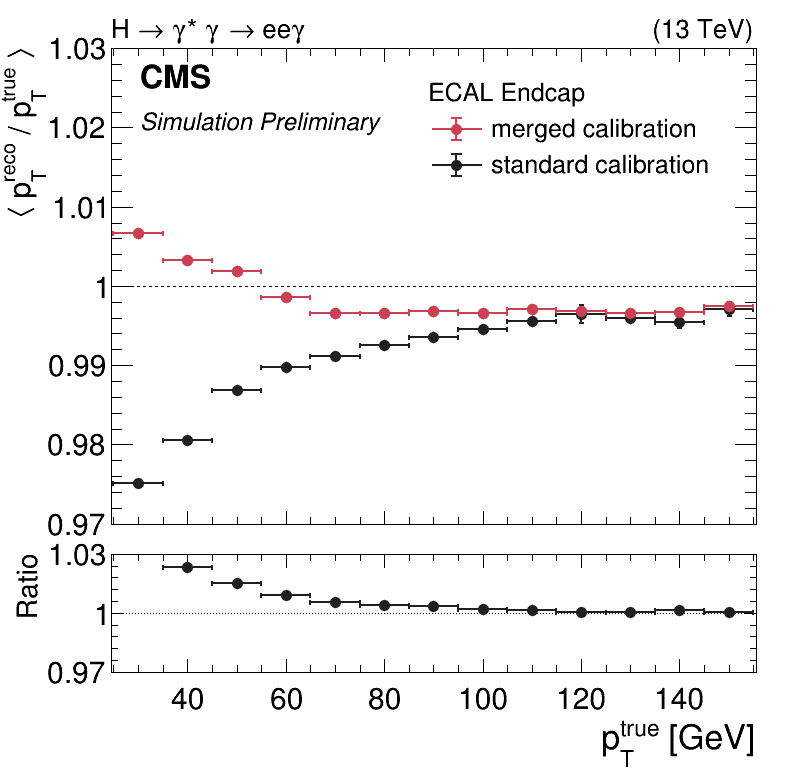

In [10]:
c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

pad1 = ROOT.TPad("pad1", " ", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.03)
pad1.SetTopMargin(0.09)
pad1.SetRightMargin(0.05)
pad1.SetLeftMargin(0.14)
pad1.Draw()
pad1.cd()

mu_err_XGB.GetXaxis().SetTitle("")
mu_err_XGB.GetYaxis().SetTitle("#LT p^{reco}_{T} / p^{true}_{T} #GT")
mu_err_XGB.GetYaxis().SetRangeUser(0.97, 1.03)
mu_err_XGB.GetYaxis().SetNdivisions(506)
mu_err_XGB.GetYaxis().SetTickSize(0.03)
mu_err_XGB.GetYaxis().SetTitleSize(0.06)
mu_err_XGB.GetYaxis().SetLabelSize(0.06)
mu_err_XGB.GetYaxis().SetTitleOffset(1.15)

mu_err_XGB.GetXaxis().SetRangeUser(25, 155)
mu_err_XGB.GetXaxis().SetTickSize(0.03)
mu_err_XGB.GetXaxis().SetTitleSize(0.06)
mu_err_XGB.GetXaxis().SetLabelSize(0.05)
mu_err_XGB.GetXaxis().SetLabelOffset(0.1)
mu_err_XGB.GetXaxis().SetTitleOffset(1)
mu_err_XGB.SetMarkerColor(ROOT.TColor.GetColor("#CC4054"))
mu_err_XGB.SetMarkerSize(1.4)
mu_err_XGB.SetMarkerStyle(20)
mu_err_XGB.SetLineColor(ROOT.TColor.GetColor("#CC4054"))
mu_err_XGB.SetLineWidth(2)
mu_err_XGB.Draw("AP")

mu_err_EGM.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
mu_err_EGM.SetMarkerSize(1.4)
mu_err_EGM.SetMarkerStyle(20)
mu_err_EGM.SetLineColor(ROOT.TColor.GetColor("#202020"))
mu_err_EGM.SetLineWidth(2)

l = ROOT.TLine(25, 1, 155, 1)
l.SetLineStyle(2)
l.SetLineColor(1)
l.Draw()

mu_err_EGM.Draw("P same")
mu_err_XGB.Draw("P same")

region = "ECAL Barrrel" if iBE == 0 else "ECAL Endcap"
leg = ROOT.TLegend(0.53, 0.66, 0.88, 0.86)
leg.SetHeader(region)
leg.SetTextFont(42)
leg.SetTextSize(0.05)
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.AddEntry(mu_err_XGB, "merged calibration", "LE1P")
leg.AddEntry(mu_err_EGM, "standard calibration", "LE1P")
leg.Draw("same")

CMS_lumi(pad1, 5, 10, "", 2017, True, "Simulation Preliminary", "H #rightarrow #gamma* #gamma #rightarrow ee#gamma", "")
c1.cd()

pad2 = ROOT.TPad("pad2", "", 0, 0, 1, 0.3)
pad2.SetGridy()
pad2.SetRightMargin(0.05)
pad2.SetLeftMargin(0.14)
pad2.SetTopMargin(0.06)
pad2.SetBottomMargin(0.43)
pad2.Draw()
pad2.cd()

nPoints = mu_err_XGB.GetN()
ratio_err = ROOT.TGraphErrors(nPoints)
for i in range(nPoints):
    xp = mu_err_XGB.GetPointX(i)
    yp = mu_err_XGB.GetPointY(i)/mu_err_EGM.GetPointY(i)
    xp_err = mu_err_XGB.GetErrorX(i)
    yp_err = yp * np.sqrt(pow(mu_err_XGB.GetErrorY(i)/mu_err_XGB.GetPointY(i), 2) + pow(mu_err_EGM.GetErrorY(i)/mu_err_EGM.GetPointY(i), 2))
    
    ratio_err.SetPoint(i, xp, yp)
    ratio_err.SetPointError(i, xp_err, yp_err)

ratio_err.SetName("")
ratio_err.SetTitle("")
ratio_err.GetXaxis().SetTitle("p^{true}_{T} [GeV]")
ratio_err.GetYaxis().SetTitle("Ratio")
ratio_err.GetYaxis().SetRangeUser(0.97 , 1.03)

ratio_err.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
ratio_err.SetMarkerSize(1.4)
ratio_err.SetMarkerStyle(20)
ratio_err.SetLineColor(ROOT.TColor.GetColor("#202020"))
ratio_err.SetLineWidth(2)

ratio_err.GetXaxis().SetRangeUser(25, 155)
ratio_err.GetXaxis().SetTickSize(0.03 * (7/3.))
ratio_err.GetXaxis().SetTitleSize(0.16)
ratio_err.GetXaxis().SetTitleOffset(1.2)
ratio_err.GetXaxis().SetLabelSize(0.06  * (7/3.))
ratio_err.GetXaxis().SetLabelOffset(0.05)
ratio_err.GetYaxis().SetTitleSize(0.13)
ratio_err.GetYaxis().SetTitleOffset(0.22 * (7/3.))
ratio_err.GetYaxis().SetLabelSize(0.06  * (7/3.))
ratio_err.GetYaxis().SetNdivisions(502)
ratio_err.Draw("AP")

c1.Draw()

In [11]:
reg_ext = "EB" if iBE == 0 else "EE"
directory = "../plots/validation_calib/resp_mu"
if not os.path.exists(directory):
    os.makedirs(directory)

c1.Print("{}/respMu_pt_{}.pdf".format(directory, reg_ext))
c1.Close()

Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_mu/respMu_pt_EE.pdf has been created


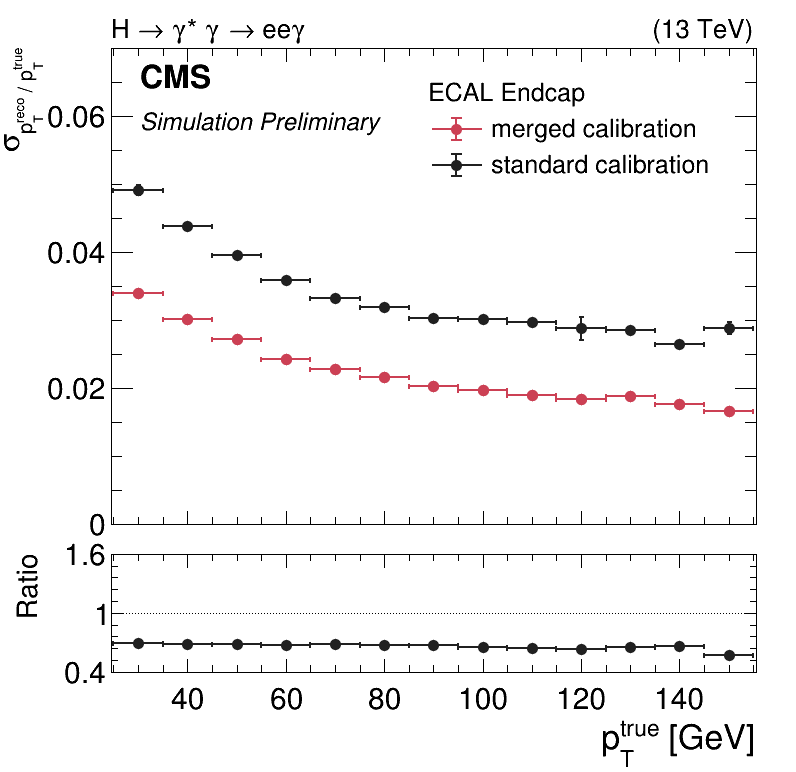

In [12]:
c1 = ROOT.TCanvas("c1", "", 800, 800)
c1.cd()

pad1 = ROOT.TPad("pad1", " ", 0, 0.3, 1, 1.0)
pad1.SetBottomMargin(0.03)
pad1.SetTopMargin(0.09)
pad1.SetRightMargin(0.05)
pad1.SetLeftMargin(0.14)
pad1.Draw()
pad1.cd()

width_err_XGB.GetXaxis().SetTitle("")
width_err_XGB.GetYaxis().SetTitle("#sigma_{p^{reco}_{T} / p^{true}_{T}}")
width_err_XGB.GetYaxis().SetRangeUser(0, 0.07)
width_err_XGB.GetYaxis().SetNdivisions(506)
width_err_XGB.GetYaxis().SetTickSize(0.03)
width_err_XGB.GetYaxis().SetTitleSize(0.06)
width_err_XGB.GetYaxis().SetLabelSize(0.06)
width_err_XGB.GetYaxis().SetTitleOffset(1.15)

width_err_XGB.GetXaxis().SetRangeUser(25, 155)
width_err_XGB.GetXaxis().SetTickSize(0.03)
width_err_XGB.GetXaxis().SetTitleSize(0.06)
width_err_XGB.GetXaxis().SetLabelSize(0.05)
width_err_XGB.GetXaxis().SetLabelOffset(0.1)
width_err_XGB.GetXaxis().SetTitleOffset(1)
width_err_XGB.SetMarkerColor(ROOT.TColor.GetColor("#CC4054"))
width_err_XGB.SetMarkerSize(1.4)
width_err_XGB.SetMarkerStyle(20)
width_err_XGB.SetLineColor(ROOT.TColor.GetColor("#CC4054"))
width_err_XGB.SetLineWidth(2)
width_err_XGB.Draw("AP")

width_err_EGM.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
width_err_EGM.SetMarkerSize(1.4)
width_err_EGM.SetMarkerStyle(20)
width_err_EGM.SetLineColor(ROOT.TColor.GetColor("#202020"))
width_err_EGM.SetLineWidth(2)

# l = ROOT.TLine(25, 1, 155, 1)
# l.SetLineStyle(2)
# l.SetLineColor(1)
# l.Draw()
    
width_err_EGM.Draw("P same")
width_err_XGB.Draw("P same")

region = "ECAL Barrrel" if iBE == 0 else "ECAL Endcap"
leg = ROOT.TLegend(0.53, 0.66, 0.88, 0.86)
leg.SetHeader(region)
leg.SetTextFont(42)
leg.SetTextSize(0.05)
leg.SetFillColor(0)
leg.SetLineColor(0)
leg.AddEntry(mu_err_XGB, "merged calibration", "LE1P")
leg.AddEntry(mu_err_EGM, "standard calibration", "LE1P")
leg.Draw("same")

CMS_lumi(pad1, 5, 10, "", 2017, True, "Simulation Preliminary", "H #rightarrow #gamma* #gamma #rightarrow ee#gamma", "")
c1.cd()

pad2 = ROOT.TPad("pad2", "", 0, 0, 1, 0.3)
pad2.SetGridy()
pad2.SetRightMargin(0.05)
pad2.SetLeftMargin(0.14)
pad2.SetTopMargin(0.06)
pad2.SetBottomMargin(0.43)
pad2.Draw()
pad2.cd()

nPoints = width_err_XGB.GetN()
ratio_err = ROOT.TGraphErrors(nPoints)
for i in range(nPoints):
    xp = width_err_XGB.GetPointX(i)
    yp = width_err_XGB.GetPointY(i)/width_err_EGM.GetPointY(i)
    xp_err = width_err_XGB.GetErrorX(i)
    yp_err = yp * np.sqrt(pow(width_err_XGB.GetErrorY(i)/width_err_XGB.GetPointY(i), 2) + pow(width_err_EGM.GetErrorY(i)/width_err_EGM.GetPointY(i), 2))
    
    ratio_err.SetPoint(i, xp, yp)
    ratio_err.SetPointError(i, xp_err, yp_err)

ratio_err.SetName("")
ratio_err.SetTitle("")
ratio_err.GetXaxis().SetTitle("p^{true}_{T} [GeV]")
ratio_err.GetYaxis().SetTitle("Ratio")
ratio_err.GetYaxis().SetRangeUser(0.4 , 1.6)

ratio_err.SetMarkerColor(ROOT.TColor.GetColor("#202020"))
ratio_err.SetMarkerSize(1.4)
ratio_err.SetMarkerStyle(20)
ratio_err.SetLineColor(ROOT.TColor.GetColor("#202020"))
ratio_err.SetLineWidth(2)

ratio_err.GetXaxis().SetRangeUser(25, 155)
ratio_err.GetXaxis().SetTickSize(0.03 * (7/3.))
ratio_err.GetXaxis().SetTitleSize(0.16)
ratio_err.GetXaxis().SetTitleOffset(1.2)
ratio_err.GetXaxis().SetLabelSize(0.06  * (7/3.))
ratio_err.GetXaxis().SetLabelOffset(0.05)
ratio_err.GetYaxis().SetTitleSize(0.13)
ratio_err.GetYaxis().SetTitleOffset(0.22 * (7/3.))
ratio_err.GetYaxis().SetLabelSize(0.06  * (7/3.))
ratio_err.GetYaxis().SetNdivisions(502)
ratio_err.Draw("AP")

c1.Draw()

In [13]:
reg_ext = "EB" if iBE == 0 else "EE"
directory = "../plots/validation_calib/resp_width"
if not os.path.exists(directory):
    os.makedirs(directory)
c1.Print("{}/respWidth_pt_{}.pdf".format(directory, reg_ext))
c1.Close()

Info in <TCanvas::Print>: pdf file ../plots/validation_calib/resp_width/respWidth_pt_EE.pdf has been created
